In [1]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("data/cleaned_heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]


thalach        0.127623
oldpeak        0.120266
age            0.113396
chol           0.107469
ca             0.102619
trestbps       0.099253
cp_4.0         0.065627
thal_7.0       0.064389
exang_1.0      0.043067
slope_2.0      0.033297
sex_1.0        0.027878
restecg_2.0    0.024976
fbs_1.0        0.019121
cp_3.0         0.016628
thal_6.0       0.012327
dtype: float64


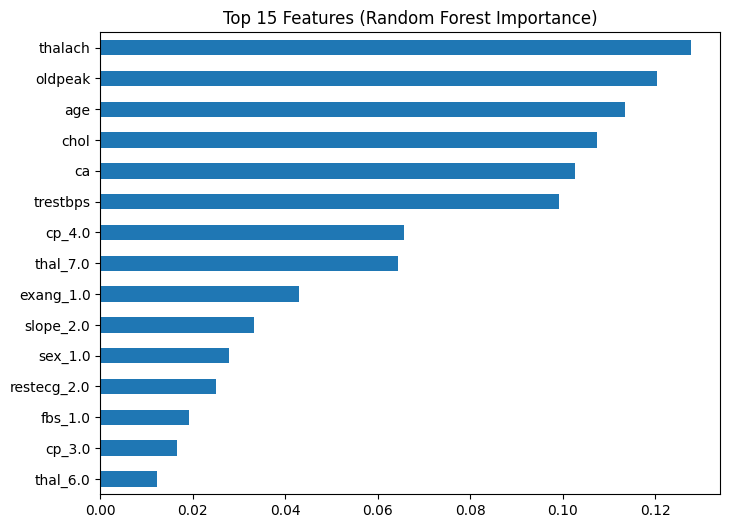

In [2]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Show top 15
print(importances.head(15))

# Plot
plt.figure(figsize=(8,6))
importances.head(15).plot(kind="barh")
plt.title("Top 15 Features (Random Forest Importance)")
plt.gca().invert_yaxis()
plt.show()


In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression as the base model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Select top 10 features
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X, y)

selected_rfe = X.columns[rfe.support_]
print("Selected features by RFE:", selected_rfe.tolist())


Selected features by RFE: ['thalach', 'oldpeak', 'ca', 'sex_1.0', 'cp_2.0', 'cp_4.0', 'fbs_1.0', 'restecg_2.0', 'slope_2.0', 'thal_7.0']


In [4]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] for chi2
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Select top 10 features
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)

selected_chi2 = X.columns[chi2_selector.get_support()]
print("Selected features by Chi-Square:", selected_chi2.tolist())


Selected features by Chi-Square: ['oldpeak', 'ca', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'thal_6.0', 'thal_7.0']


# Choosing The most important fetures based on the suggestions of the three methods 

In [5]:
final_features = [
    "thalach", "oldpeak", "age", "chol", "ca", "trestbps",
    "sex_1.0", "cp_2.0", "cp_4.0", "slope_2.0", "thal_7.0"
]

df_reduced = df[final_features + ["target"]]
df_reduced.to_csv("data/reduced_heart_disease.csv", index=False)

print("✅ Reduced dataset saved with", len(final_features), "features")


✅ Reduced dataset saved with 11 features


# Check that reduced df performs better in modeling 

In [6]:
from sklearn.model_selection import train_test_split



X_reduced = df[final_features]

# Train/test split (same split for both to be fair)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X, y, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Full model
clf_full = LogisticRegression(max_iter=1000, random_state=42)
clf_full.fit(Xf_train, yf_train)
yfull_pred = clf_full.predict(Xf_test)

# Reduced model
clf_reduced = LogisticRegression(max_iter=1000, random_state=42)
clf_reduced.fit(Xr_train, yr_train)
yred_pred = clf_reduced.predict(Xr_test)

# Compare accuracy
print("Full feature accuracy:", accuracy_score(yf_test, yfull_pred))
print("Reduced feature accuracy:", accuracy_score(yr_test, yred_pred))


Full feature accuracy: 0.45901639344262296
Reduced feature accuracy: 0.5245901639344263
